In [1]:
from __future__ import division

from cmath import *
from math import radians
from numpy import arange

import matplotlib.pyplot as plt
%matplotlib inline

### Constants

In [2]:
# refraction indices
n1 = 1.519   # glass
n2 = 1.425   # protein
n3 = 1.332   # buffer

# wavelength (in nm)
l = 633

### Auxiliary functions

In [3]:
# refraction angle
def theta_func(na, nb, thetaa):
    return asin( na * sin(thetaa) / nb )

# p-reflectivity
def rp_func(na, nb, thetaa):
    thetab = theta_func(na, nb, thetaa)
    rpab = (nb*cos(thetaa) - na*cos(thetab)) / (nb*cos(thetaa) + na*cos(thetab))
    return rpab

# s-reflectivity
def rs_func(na, nb, thetaa):
    thetab = theta_func(na, nb, thetaa)
    rsab = (na*cos(thetaa) - nb*cos(thetab)) / (na*cos(thetaa) + nb*cos(thetab))
    return rsab

# reflectivity of the film
def r_func(r12, r23, gamma):
    return (r12 + r23*exp(2j*gamma))/(1 + r12*r23*exp(2j*gamma))

# first order delta
def delta1_func(r12, r23, r13, gamma):
    return 2j*r23 * (1 - r12*r13) * gamma / (r12 + r23)

# second order delta
def delta2_func(r12, r23, r13, gamma):
    return - 2*r23*r13 * (1 - r12*r13) * (1 - r12*r23) * gamma**2 / (r12 + r23)**2

### Deltas

In [4]:
def deltas(d, theta):

    # incidence angles (in radians)
    theta1 = radians(theta)
    theta2 = theta_func(n1, n2, theta1)
    theta3 = theta_func(n1, n3, theta1)

    # gamma
    gamma = 2 * pi * n2 *cos(theta2) * d / l
    
    # p-reflectivities
    rp12 = rp_func(n1, n2, theta1)
    rp23 = rp_func(n2, n3, theta2)
    rp13 = rp_func(n1, n3, theta1)
    
    # s-reflectivities
    rs12 = rs_func(n1, n2, theta1)
    rs23 = rs_func(n2, n3, theta2)
    rs13 = rs_func(n1, n3, theta1)
    
    # reference reflectivities
    rp0 = rp13
    rs0 = rs13

    # total reflectivities
    rp = r_func(rp12, rp23, gamma)
    rs = r_func(rs12, rs23, gamma)
    
    # full answer
    deltap = (rp - rp0) / rp0
    deltas = (rs - rs0) / rs0
    delta = deltap - deltas

    # first order term
    deltap1 = delta1_func(rp12, rp23, rp13, gamma)
    deltas1 = delta1_func(rs12, rs23, rs13, gamma)
    delta1 = deltap1 - deltas1

    # second order term
    deltap2 = delta2_func(rp12, rp23, rp13, gamma)
    deltas2 = delta2_func(rs12, rs23, rs13, gamma)
    delta2 = deltap2 - deltas2

    return delta, delta1, delta2

### Single nulling signals

In [5]:
def single(d, theta):

    # incidence angles (in radians)
    theta1 = radians(theta)
    theta2 = theta_func(n1, n2, theta1)
    theta3 = theta_func(n1, n3, theta1)

    # gamma
    gamma = 2 * pi * n2 *cos(theta2) * d / l
    
    # p-reflectivities
    rp12 = rp_func(n1, n2, theta1)
    rp23 = rp_func(n2, n3, theta2)
    rp13 = rp_func(n1, n3, theta1)
    
    # s-reflectivities
    rs12 = rs_func(n1, n2, theta1)
    rs23 = rs_func(n2, n3, theta2)
    rs13 = rs_func(n1, n3, theta1)
    
    # reference reflectivities
    rp0 = rp13
    rs0 = rs13

    # total reflectivities
    rp = r_func(rp12, rp23, gamma)
    rs = r_func(rs12, rs23, gamma)
    
    # phases
    phip0 = phase(rp0)
    phis0 = phase(rs0)
    phip = phase(rp)
    phis = phase(rs)
    
    # absolute reflectivities
    rrp0 = abs(rp0)
    rrs0 = abs(rs0)
    rrp = abs(rp)
    rrs = abs(rs)
    
    # normalized first and second harmonics
    single1H = ( sin((phip - phis) - (phip0 - phis0)) ).real
    single2H = ( (rrp**2 - rrs**2)/(rrp0**2 - rrs0**2) - 1 ).real

    return single1H, single2H

### Double nulling signals

In [6]:
def double(d, theta):

    # incidence angles (in radians)
    theta1 = radians(theta)
    theta2 = theta_func(n1, n2, theta1)
    theta3 = theta_func(n1, n3, theta1)

    # gamma
    gamma = 2 * pi * n2 *cos(theta2) * d / l
    
    # p-reflectivities
    rp12 = rp_func(n1, n2, theta1)
    rp23 = rp_func(n2, n3, theta2)
    rp13 = rp_func(n1, n3, theta1)
    
    # s-reflectivities
    rs12 = rs_func(n1, n2, theta1)
    rs23 = rs_func(n2, n3, theta2)
    rs13 = rs_func(n1, n3, theta1)
    
    # reference reflectivities
    rp0 = rp13
    rs0 = rs13

    # total reflectivities
    rp = r_func(rp12, rp23, gamma)
    rs = r_func(rs12, rs23, gamma)
    
    # phases
    phip0 = phase(rp0)
    phis0 = phase(rs0)
    phip = phase(rp)
    phis = phase(rs)
    
    # absolute reflectivities
    rrp0 = abs(rp0)
    rrs0 = abs(rs0)
    rrp = abs(rp)
    rrs = abs(rs)
    
    # normalized first and second harmonics
    double1H = ( sin((phip - phis) - (phip0 - phis0)) ).real
    double2H = 0.5 * ( rrp**2 / rrp0**2 - rrs**2 / rrs0**2 ).real

    return double1H, double2H

### Calculation

In [7]:
# angle of incidence (in degrees)
theta = 36

# film thickness (in nm)
d = 4

In [8]:
delta, delta1, delta2 = deltas(d, theta)
residual1 = delta - delta1

print 'Full relative reflectivity difference is: \t', \
      '{0:.6f} {1} {2:.6f}i'.format(delta.real, '+-'[delta.imag < 0], abs(delta.imag)), '\n'

# delta1.real+0 is a dirty hack to avoid printing -0.000000
print 'First order term is: \t\t\t\t', \
      '{0:.6f} {1} {2:.6f}i'.format(delta1.real+0, '+-'[delta1.imag < 0], abs(delta1.imag)), '\n'

print 'Residual is: \t\t\t\t\t', \
      '{0:.6f} {1} {2:.6f}i'.format(residual1.real, '+-'[residual1.imag < 0], abs(residual1.imag))

Full relative reflectivity difference is: 	0.000463 - 0.010756i 

First order term is: 				0.000000 - 0.010769i 

Residual is: 					0.000463 + 0.000013i


In [9]:

single1H, single2H = single(d, theta)

print 'Normalized first harmonic signal in single nulling mode is: \t', '{0:.6f}'.format(single1H), '\n'
print 'Normalized second harmonic signal in single nulling mode is: \t', '{0:.6f}'.format(single2H), '\n'

Normalized first harmonic signal in single nulling mode is: 	-0.010776 

Normalized second harmonic signal in single nulling mode is: 	-0.001912 



In [10]:
double1H, double2H = double(d, theta)

print 'Normalized first harmonic signal in double nulling mode is: \t', '{0:.6f}'.format(double1H), '\n'
print 'Normalized second harmonic signal in double nulling mode is: \t', '{0:.6f}'.format(double2H), '\n'

Normalized first harmonic signal in double nulling mode is: 	-0.010776 

Normalized second harmonic signal in double nulling mode is: 	0.000016 



## Range of thicknesses
### First order approximation

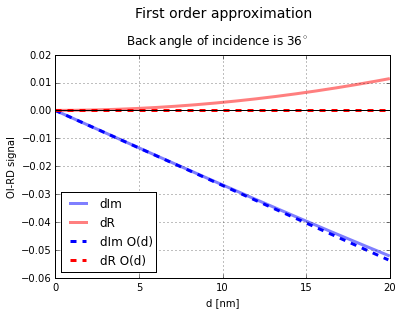

In [11]:
dmin = 0
dmax = 20
dd = 0.1

dlist = arange(dmin, dmax, dd)

deltaIm = []
deltaRe = []
delta1Im = []
delta1Re = []
residualIm = []
residualRe = []

for d in dlist:
    delta, delta1, delta2 = deltas(d, theta)
    reresidual1 = delta - delta1
    
    deltaIm.append(delta.imag)
    deltaRe.append(delta.real)
    
    delta1Im.append(delta1.imag)
    delta1Re.append(delta1.real)
    
    residualIm.append(residual1.imag)
    residualRe.append(residual1.real)
    
plt.plot(dlist, deltaIm, lw = 3, color = 'b', alpha = 0.5, label = 'dIm')
plt.plot(dlist, deltaRe, lw = 3, color = 'r', alpha = 0.5, label = 'dR')

plt.plot(dlist, delta1Im, lw = 3, color = 'b', ls = '--', label = 'dIm O(d)')
plt.plot(dlist, delta1Re, lw = 3, color = 'r', ls = '--', label = 'dR O(d)')

plt.axhline(y=0, color='k')
plt.grid()
plt.xlabel('d [nm]')
plt.ylabel('OI-RD signal')

plt.legend(loc = 3)

plt.title('First order approximation\n\n', fontsize = 14)
plt.suptitle('Back angle of incidence is ' + str(theta) + '$^\circ$', fontsize = 12)

### Single nulling

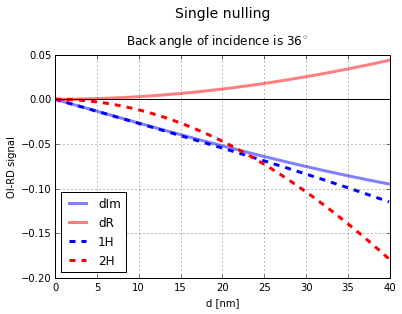

In [12]:
dmin = 0
dmax = 40
dd = 0.1

dlist = arange(dmin, dmax, dd)

deltaIm = []
deltaRe = []
single1H = []
single2H = []

for d in dlist:
    delta, delta1, delta2 = deltas(d, theta)
    s1H, s2H = single(d, theta)
    
    deltaIm.append(delta.imag)
    deltaRe.append(delta.real)
    
    single1H.append(s1H)
    single2H.append(s2H)
    
plt.plot(dlist, deltaIm, lw = 3, color = 'b', alpha = 0.5, label = 'dIm')
plt.plot(dlist, deltaRe, lw = 3, color = 'r', alpha = 0.5, label = 'dR')

plt.plot(dlist, single1H, lw = 3, color = 'b', ls = '--', label = '1H')
plt.plot(dlist, single2H, lw = 3, color = 'r', ls = '--', label = '2H')

plt.axhline(y=0, color='k')
plt.grid()
plt.xlabel('d [nm]')
plt.ylabel('OI-RD signal')

plt.legend(loc = 3)

plt.title('Single nulling\n\n', fontsize = 14)
plt.suptitle('Back angle of incidence is ' + str(theta) + '$^\circ$', fontsize = 12)

### Double nulling

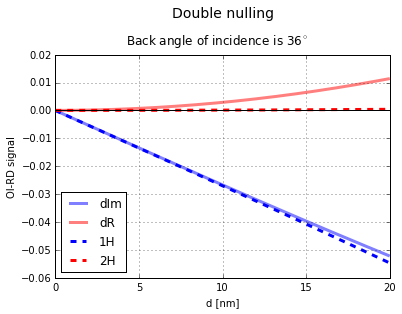

In [13]:
dmin = 0
dmax = 20
dd = 0.1

dlist = arange(dmin, dmax, dd)

deltaIm = []
deltaRe = []
double1H = []
double2H = []

for d in dlist:
    delta, delta1, delta2 = deltas(d, theta)
    d1H, d2H = double(d, theta)
    
    deltaIm.append(delta.imag)
    deltaRe.append(delta.real)
    
    double1H.append(d1H)
    double2H.append(d2H)
    
plt.plot(dlist, deltaIm, lw = 3, color = 'b', alpha = 0.5, label = 'dIm')
plt.plot(dlist, deltaRe, lw = 3, color = 'r', alpha = 0.5, label = 'dR')

plt.plot(dlist, double1H, lw = 3, color = 'b', ls = '--', label = '1H')
plt.plot(dlist, double2H, lw = 3, color = 'r', ls = '--', label = '2H')

plt.axhline(y=0, color='k')
plt.grid()
plt.xlabel('d [nm]')
plt.ylabel('OI-RD signal')

plt.legend(loc = 3)

plt.title('Double nulling\n\n', fontsize = 14)
plt.suptitle('Back angle of incidence is ' + str(theta) + '$^\circ$', fontsize = 12)

## Complex refraction index of the film

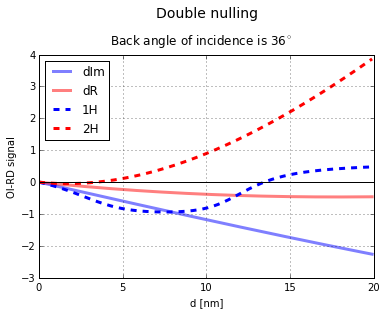

In [14]:
n2 = 1.425 + 0.7j   # protein

dmin = 0
dmax = 20
dd = 0.1

dlist = arange(dmin, dmax, dd)

deltaIm = []
deltaRe = []
double1H = []
double2H = []

for d in dlist:
    delta, delta1, delta2 = deltas(d, theta)
    d1H, d2H = double(d, theta)
    
    deltaIm.append(delta.imag)
    deltaRe.append(delta.real)
    
    double1H.append(d1H)
    double2H.append(d2H)
    
plt.plot(dlist, deltaIm, lw = 3, color = 'b', alpha = 0.5, label = 'dIm')
plt.plot(dlist, deltaRe, lw = 3, color = 'r', alpha = 0.5, label = 'dR')

plt.plot(dlist, double1H, lw = 3, color = 'b', ls = '--', label = '1H')
plt.plot(dlist, double2H, lw = 3, color = 'r', ls = '--', label = '2H')

plt.axhline(y=0, color='k')
plt.grid()
plt.xlabel('d [nm]')
plt.ylabel('OI-RD signal')

plt.legend(loc = 2)

plt.title('Double nulling\n\n', fontsize = 14)
plt.suptitle('Back angle of incidence is ' + str(theta) + '$^\circ$', fontsize = 12)

n2 = 1.425